**TASK #4A**

NAME : DHANSHREE PRADEEP GURAV

Create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices.





In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
!pip install TFANN

  Created wheel for TFANN: filename=TFANN-1.0.1-cp36-none-any.whl size=7539 sha256=1a143c51ccabdad657f52e6cc76662330d38cc768f7a280ec4156f6d3f1d25f3
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


In [4]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files

In [5]:
files.upload()


Saving ZBH.csv to ZBH.csv


{'ZBH.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-10-07,136.169998,137.110001,134.100006,134.500000,133.439011,913500\n2019-10-08,133.630005,133.929993,130.619995,131.220001,130.184875,1321500\n2019-10-09,132.300003,133.630005,131.000000,133.419998,132.367538,903300\n2019-10-10,132.720001,135.169998,132.289993,134.070007,133.012405,999300\n2019-10-11,135.139999,137.610001,135.139999,136.440002,135.363708,1155500\n2019-10-14,136.190002,137.229996,134.600006,135.240005,134.173187,751500\n2019-10-15,136.979996,139.149994,135.889999,137.889999,136.802261,1151500\n2019-10-16,137.550003,137.669998,135.080002,136.580002,135.502609,1173400\n2019-10-17,137.119995,138.910004,136.960007,138.509995,137.417374,663900\n2019-10-18,138.029999,138.919998,136.990005,137.610001,136.524475,694700\n2019-10-21,138.029999,138.600006,136.610001,137.600006,136.514557,787100\n2019-10-22,137.940002,137.940002,134.750000,134.820007,133.756500,639800\n2019-10-23,135.300003,136.089996,134.850006,135.220

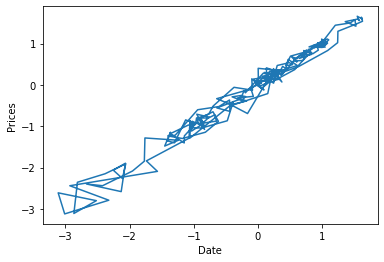

In [7]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('ZBH.csv', delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
stock_data=scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.xlabel('Date')
mpl.ylabel('Prices')
mpl.show()

In [9]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params

mlpr = ANNR([input], layers, batchSize = 240, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)
# mlpr = ANNR([input],layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4)

In [10]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)

#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      3.34682918 (Batch Size:   240)
Iter     2	      3.25405860 (Batch Size:   240)
Iter     3	      3.17107511 (Batch Size:   240)
Iter     4	      3.15134752 (Batch Size:   240)
Iter     5	      3.04208195 (Batch Size:   240)
Iter     6	      2.97590923 (Batch Size:   240)
Iter     7	      2.90598869 (Batch Size:   240)
Iter     8	      2.84083652 (Batch Size:   240)
Iter     9	      2.78403902 (Batch Size:   240)
Iter    10	      2.71011734 (Batch Size:   240)
Iter    11	      2.63576150 (Batch Size:   240)
Iter    12	      2.57651579 (Batch Size:   240)
Iter    13	      2.51847172 (Batch Size:   240)
Iter    14	      2.43816197 (Batch Size:   240)
Iter    15	      2.36242294 (Batch Size:   240)
Iter    16	      2.31076992 (Batch Size:   240)
Iter    17	      2.24257052 (Batch Size:   240)
Iter    18	      2.19526625 (Batch Size:   240)
Iter    19	      2.15306342 (Batch Size:   240)
Iter    20	      2.05998611 (Batch Size:   240)
Iter    21	      2.03019977 (Batch Size:

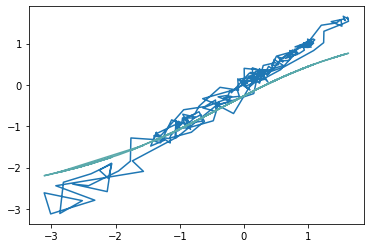

In [11]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [13]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 240, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [14]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.20526081 (Batch Size:   240)
Iter     2	      1.14776820 (Batch Size:   240)
Iter     3	      1.09150124 (Batch Size:   240)
Iter     4	      1.05364114 (Batch Size:   240)
Iter     5	      1.00207868 (Batch Size:   240)
Iter     6	      0.96425402 (Batch Size:   240)
Iter     7	      0.91507331 (Batch Size:   240)
Iter     8	      0.87275571 (Batch Size:   240)
Iter     9	      0.83424616 (Batch Size:   240)
Iter    10	      0.74939278 (Batch Size:   240)
Iter    11	      0.74024853 (Batch Size:   240)
Iter    12	      0.70326629 (Batch Size:   240)
Iter    13	      0.65712482 (Batch Size:   240)
Iter    14	      0.62013763 (Batch Size:   240)
Iter    15	      0.56952438 (Batch Size:   240)
Iter    16	      0.56461644 (Batch Size:   240)
Iter    17	      0.50609632 (Batch Size:   240)
Iter    18	      0.48875436 (Batch Size:   240)
Iter    19	      0.45599174 (Batch Size:   240)
Iter    20	      0.43506530 (Batch Size:   240)
Iter    21	      0.40126640 (Batch Size:

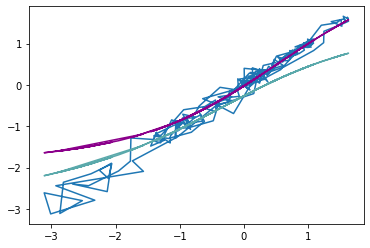

In [15]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()